# Cutoff Finder

The idea is to cut the data into two and find the place where variance left + variance right is minimized.

(array([ 3.,  1.,  0.,  6.,  4.,  9.,  8., 10., 14., 19., 15., 20., 13.,
        25., 21., 29., 17., 20., 16., 11., 14., 15.,  9.,  6.,  9., 10.,
        10., 22., 12., 36., 39., 42., 28., 33., 39., 34., 34., 27., 37.,
        26., 21., 14.,  4.,  8.,  4.,  2.,  2.,  0.,  0.,  2.]),
 array([-0.360971  , -0.262733  , -0.164495  , -0.06625701,  0.03198099,
         0.13021899,  0.22845699,  0.32669499,  0.42493299,  0.52317099,
         0.62140899,  0.71964698,  0.81788498,  0.91612298,  1.01436098,
         1.11259898,  1.21083698,  1.30907498,  1.40731298,  1.50555098,
         1.60378897,  1.70202697,  1.80026497,  1.89850297,  1.99674097,
         2.09497897,  2.19321697,  2.29145497,  2.38969297,  2.48793096,
         2.58616896,  2.68440696,  2.78264496,  2.88088296,  2.97912096,
         3.07735896,  3.17559696,  3.27383495,  3.37207295,  3.47031095,
         3.56854895,  3.66678695,  3.76502495,  3.86326295,  3.96150095,
         4.05973895,  4.15797694,  4.25621494,  4.35445294,

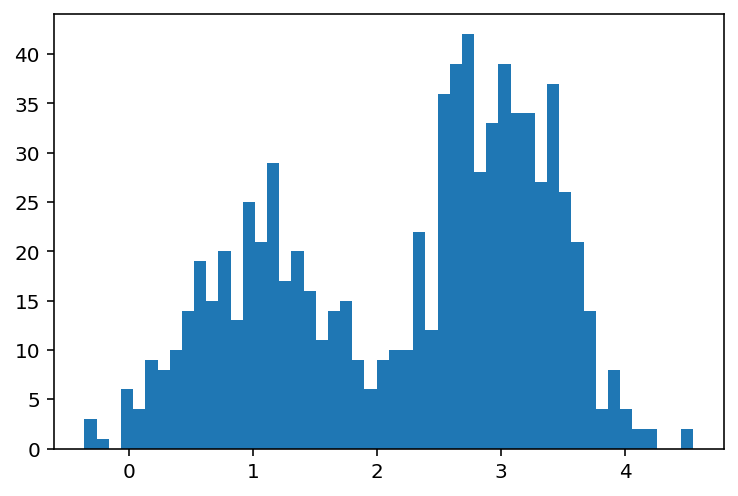

In [11]:
import numpy as np
from matplotlib import pyplot as plt
left_peak = np.random.randn(300)*0.5+1
right_peak = np.random.randn(500)*0.5 + 3

data = np.concatenate([left_peak, right_peak])
plt.hist(data, bins=50)

1.8484848484848486


<function print>

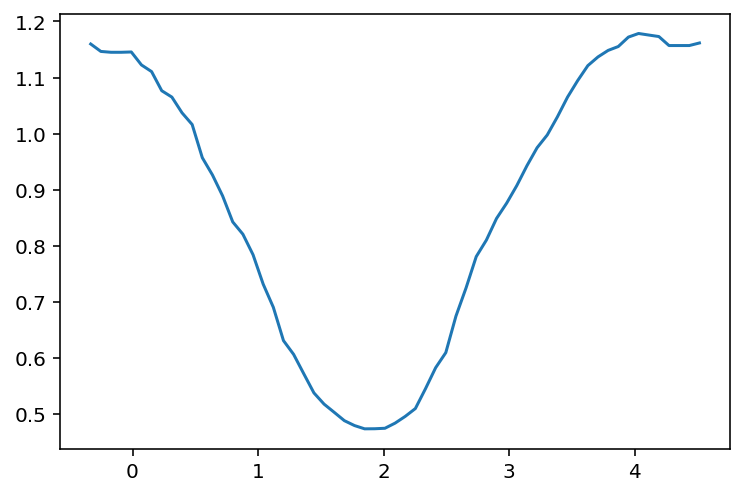

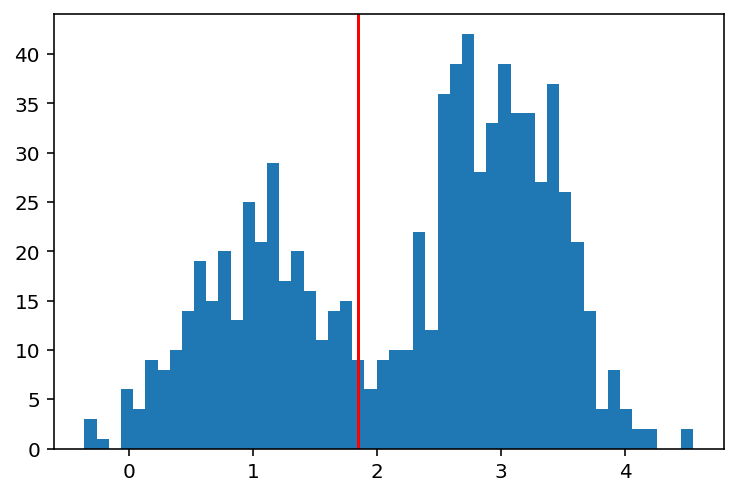

In [22]:
def variance(cutoff):
    left_mask = data<cutoff
    left = data[left_mask]
    right = data[~left_mask]
    # may need null guard
    if len(left)==0 or len(right)==0:
        return np.inf
    return np.var(left) + np.var(right)

cutoffs = np.linspace(-3,5,100)
variances = [variance(cutoff) for cutoff in cutoffs]
plt.plot(cutoffs, variances)
best_cutoff = cutoffs[np.argmin(variances)]
print(best_cutoff)
plt.figure()
plt.hist(data, bins=50)
plt.axvline(best_cutoff,color='red')
print